I have used 2 methods to detect changes

1.Using only NDVI'S of both year images

2.Using NDBI and NDVI of images

# **Method 1: Using NDVI Amaravati Images**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from osgeo import ogr, gdal, osr
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
path_nir_2013="/content/drive/My Drive/Hackathon Dataset/Change detection/Amaravathi 2013/2013-11-25_00-00_-_2013-11-25_23-59_Landsat_AWS_L8L1C_B05_(Raw).tiff"
path_nir_2019="/content/drive/My Drive/Hackathon Dataset/Change detection/Amaravathi 2019/2019-11-10_00-00_-_2019-11-10_23-59_Landsat_AWS_L8L1C_B05_(Raw).tiff"
path_red_2013="/content/drive/My Drive/Hackathon Dataset/Change detection/Amaravathi 2013/2013-11-25_00-00_-_2013-11-25_23-59_Landsat_AWS_L8L1C_B04_(Raw).tiff"
path_red_2019="/content/drive/My Drive/Hackathon Dataset/Change detection/Amaravathi 2019/2019-11-10_00-00_-_2019-11-10_23-59_Landsat_AWS_L8L1C_B04_(Raw).tiff"
path_swir_2019="/content/drive/My Drive/Hackathon Dataset/Change detection/Amaravathi 2019/2019-11-10_00-00_-_2019-11-10_23-59_Landsat_AWS_L8L1C_B07_(Raw).tiff"

In [ ]:
#Open raster bands
nir_2013 = gdal.Open(path_nir_2013)
nir_2019 = gdal.Open(path_nir_2019)
red_2013=gdal.Open(path_red_2013)
red_2019=gdal.Open(path_red_2019)
swir_2019=gdal.Open(path_swir_2019)

In [ ]:
#Read bands as matrix arrays
Nir_2013 = nir_2013.GetRasterBand(1).ReadAsArray().astype(np.float32)
Nir_2019 = nir_2019.GetRasterBand(1).ReadAsArray().astype(np.float32)
Red_2013 = red_2013.GetRasterBand(1).ReadAsArray().astype(np.float32)
Red_2019 = red_2019.GetRasterBand(1).ReadAsArray().astype(np.float32)
Swir_2019 = swir_2019.GetRasterBand(1).ReadAsArray().astype(np.float32)

In [ ]:
#Output NDVI Rasters 
path_NDVI_2013 = '/content/NDVI_2013.tiff'
path_NDVI_2019 = '/content/NDVI_2019.tiff'
path_NDBI_2019 = '/content/NDBI_2019.tiff'
path_NDVI_NDBI = '/content/NDVI_NDBI.tiff'
path_NDVI = '/content/NDVI.tiff'

# **NDVI for 2013**

In [ ]:
Ndvi_2013=(Nir_2013-Red_2013)/(Nir_2013+Red_2013)

# **NDVI for 2019**

In [ ]:
Ndvi_2019=(Nir_2019-Red_2019)/(Nir_2019+Red_2019)

In [ ]:
geotransform = nir_2013.GetGeoTransform()

originX,pixelWidth,empty,finalY,empty2,pixelHeight=geotransform
cols =  nir_2013.RasterXSize
rows =  nir_2013.RasterYSize

projection = nir_2013.GetProjection()

finalX = originX + pixelWidth * cols
originY = finalY + pixelHeight * rows

# **Defining function to save data as raster**

In [ ]:
def openRaster(fn,access=0):
  ds=gdal.Open(fn,access)
  if ds is none:
    print('error in opening file')
  return ds

In [ ]:
def getRasterBand(fn,band=1,access=0):
  ds=openRaster(fn,access)
  band=ds.GetRasterBand(1).ReadAsArray()
  return band

In [ ]:
def create_raster_from_array(fn,ds,data,driverfmt="GTiff"):
  driver=gdal.GetDriverByName(driverfmt)
  outds=driver.CreateCopy(fn,ds,strict=0)
  outds.GetRasterBand(1).WriteArray(data)
  ds=None
  outds=None

# **Plotting NDVI Image**

In [ ]:
extentArray = [originX,finalX,originY,finalY]
def plotNDVI(ndviImage,extentArray,vmin,cmap):
    ndvi = gdal.Open(ndviImage)
    ds2019 = ndvi.ReadAsArray()
    plt.figure(figsize=(20,15))
    im = plt.imshow(ds2019, vmin=vmin, cmap=cmap, extent=extentArray)#
    plt.colorbar(im, fraction=0.015)
    plt.xlabel('Este')
    plt.ylabel('Norte')
    plt.show()


In [ ]:
create_raster_from_array(path_NDVI_2013,gdal.Open(path_nir_2013),Ndvi_2013)

In [ ]:
create_raster_from_array(path_NDVI_2019,gdal.Open(path_nir_2019),Ndvi_2019)

# **Plotting NDVI 2017**

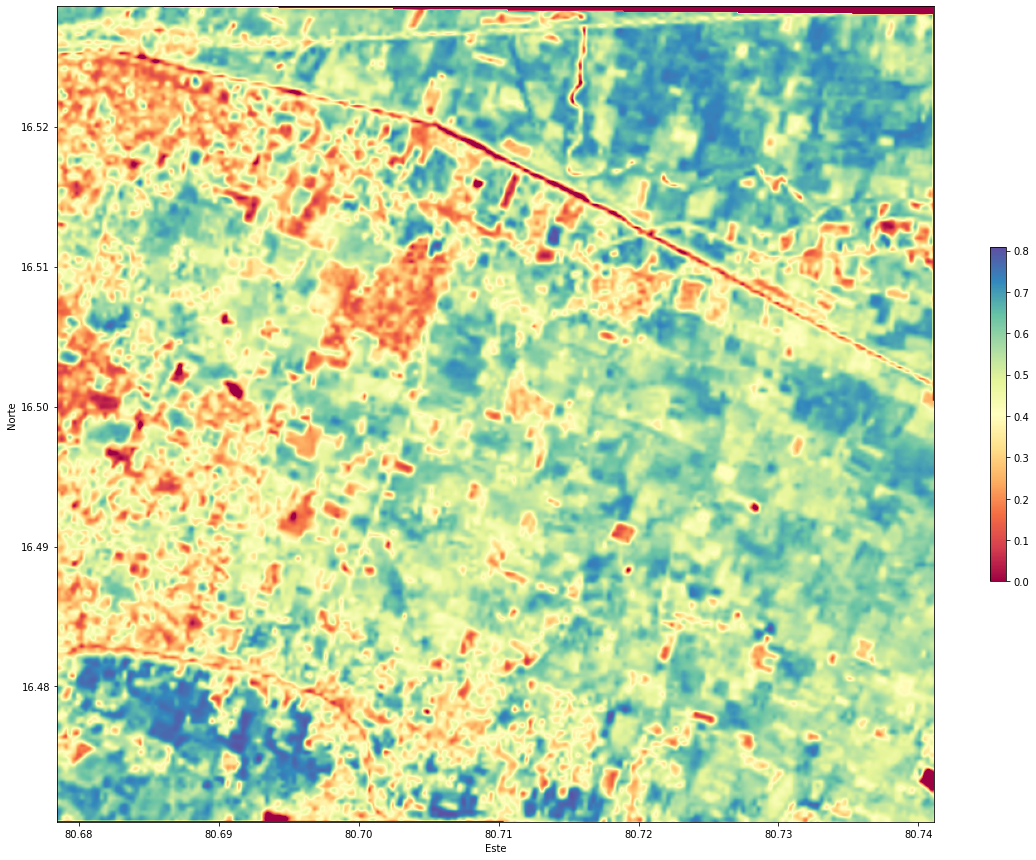

In [ ]:
plotNDVI(path_NDVI_2013,extentArray,0,'Spectral')

# **Thresholding the images to extract high ndvi values or Vegetation alone**

In [ ]:
Ndvi_2013=(Nir_2013-Red_2013)/(Nir_2013+Red_2013)

In [ ]:
Ndvi_2013[Ndvi_2013>0.48] = 1.0

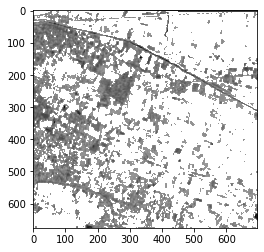

In [ ]:
plt.imshow(Ndvi_2013,interpolation='nearest',cmap=plt.cm.gray)

In [ ]:
Ndvi_2013[Ndvi_2013==1.0] = 1.0
Ndvi_2013[Ndvi_2013!=1.0]= 0.0

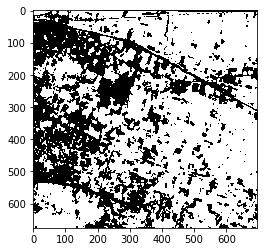

In [ ]:
plt.imshow(Ndvi_2013,interpolation='nearest',cmap=plt.cm.gray)

# **Plotting NDVI 2019 Image**

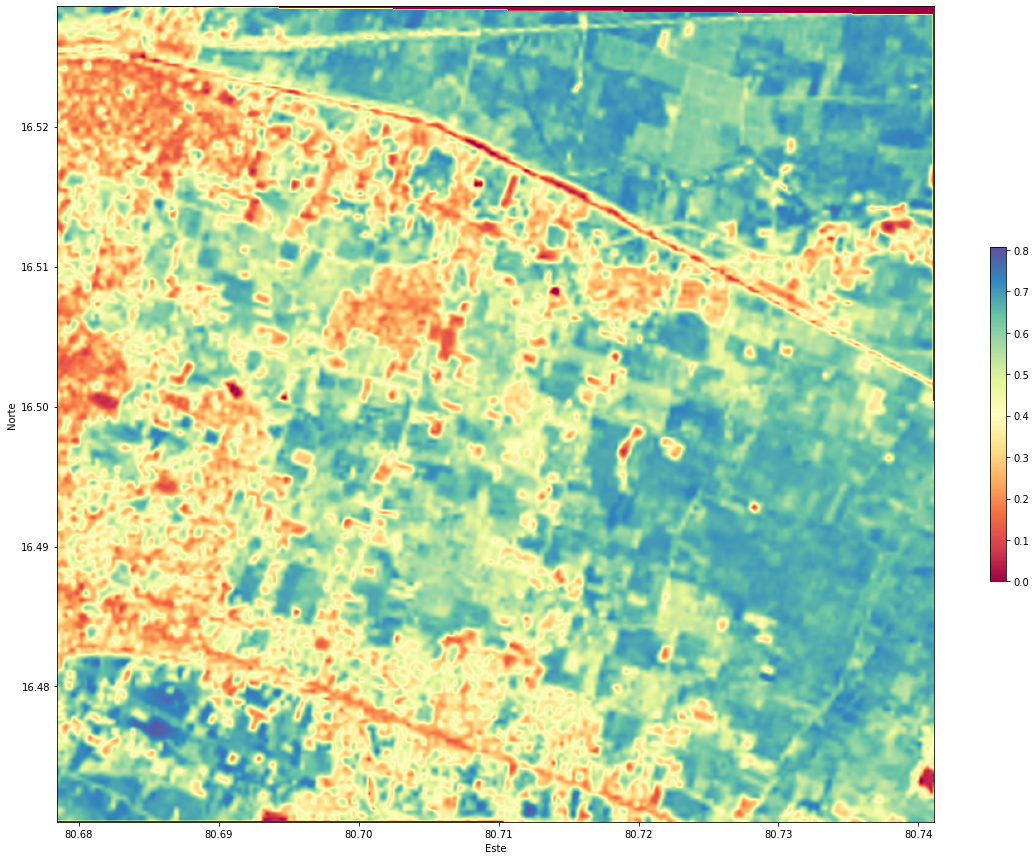

In [ ]:
plotNDVI(path_NDVI_2019,extentArray,0,'Spectral')

# **Calculating NDVI for year 2019**

In [ ]:
Ndvi_2019=(Nir_2019-Red_2019)/(Nir_2019+Red_2019)

# **Extracting only builtups from 2019**

In [ ]:
Ndvi_2019[Ndvi_2019<0.36] = 1.0

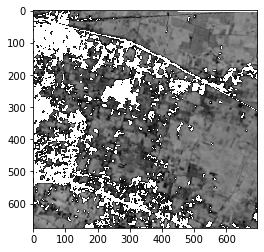

In [ ]:
plt.imshow(Ndvi_2019,interpolation='nearest',cmap=plt.cm.gray)

In [ ]:
Ndvi_2019[Ndvi_2019==1.0] = 1.0
Ndvi_2019[Ndvi_2019!=1.0]= 0.0

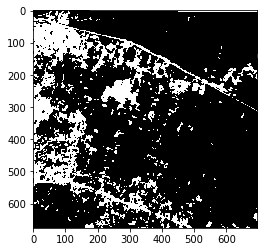

In [ ]:
plt.imshow(Ndvi_2019,interpolation='nearest',cmap=plt.cm.gray)

# **Multiplying Both Binary images, if changes are present in vegetation area it will be white in color else black**

In [ ]:
S1=np.multiply(Ndvi_2013,Ndvi_2019)

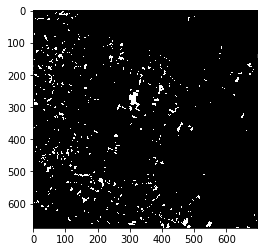

In [ ]:
plt.imshow(S1,interpolation='nearest',cmap=plt.cm.gray)

# **Considering only white and black pixels**

In [ ]:
S1[S1==1.0] = 1.0
S1[S1!=1.0] = 0.0

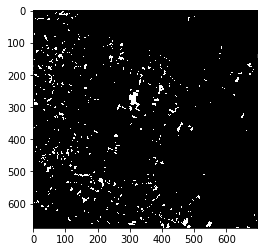

In [ ]:
plt.imshow(S1,interpolation='nearest',cmap=plt.cm.gray)

# **Saving the tiff file**

In [ ]:
f_new='/content/builtup_change_NDVIS_binary.tiff'
create_raster_from_array(f_new,gdal.Open(path_NDVI_2019),S1)

# **Method 2: USING NDBI**

# **Calculating NDBI**

In [ ]:
Ndbi_2019=(Swir_2019-Nir_2019)/(Swir_2019+Nir_2019)

# **Plotting NDBI for year 2019**

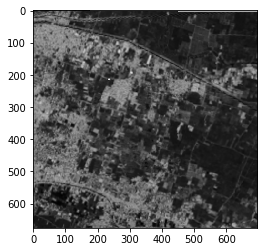

In [ ]:
plt.imshow(Ndbi_2019,interpolation='nearest',cmap=plt.cm.gray)

In [ ]:
!pip install rasterio

# **Saving Image as Raster**

In [ ]:
import rasterio
nir_2019 = rasterio.open('/content/drive/My Drive/Hackathon Dataset/Change detection/Amaravathi 2013/2013-11-25_00-00_-_2013-11-25_23-59_Landsat_AWS_L8L1C_B05_(Raw).tiff')
NDBI_image=rasterio.open(path_NDBI_2019,'w',driver='Gtiff',
                          width=nir_2019.width, 
                          height = nir_2019.height, 
                          count=1, crs=nir_2019.crs, 
                          transform=nir_2019.transform, 
                          dtype='float32')
NDBI_image.write(Ndbi_2019,1)
NDBI_image.close()


# **Plotting NDBI**

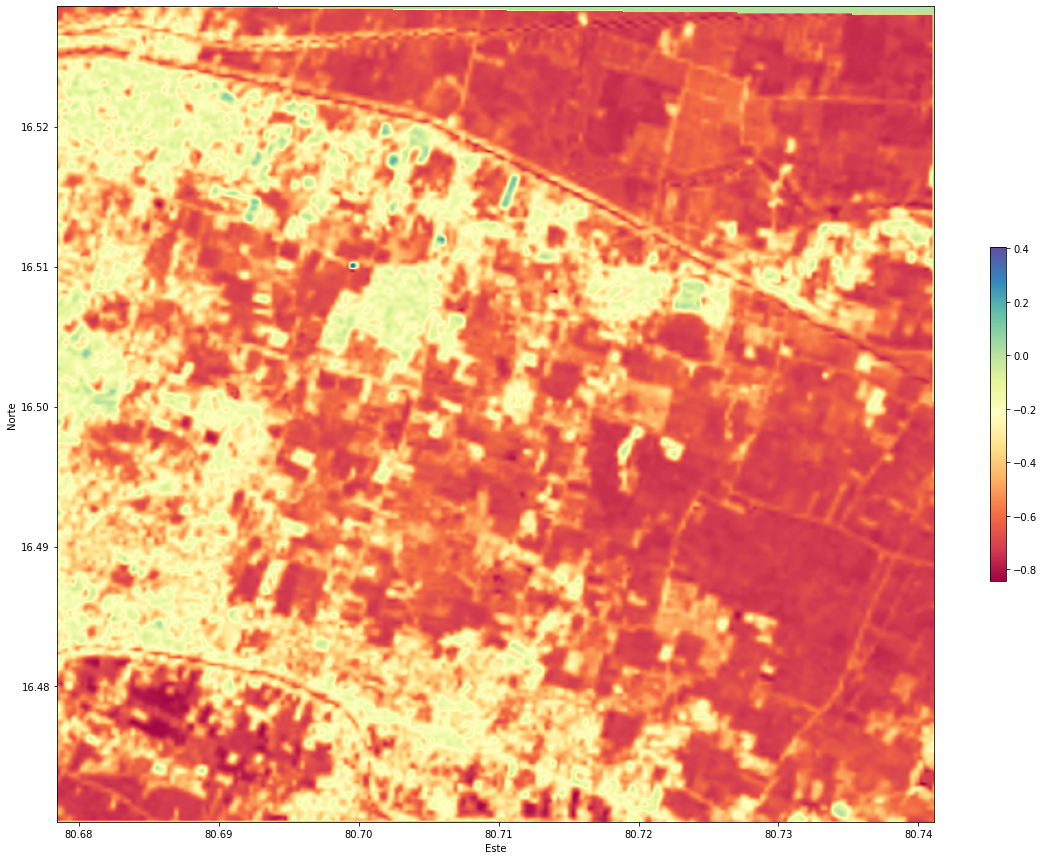

In [ ]:
ndbi = gdal.Open('/content/NDBI_2019.tiff')
ds2019 = ndbi.ReadAsArray()
plt.figure(figsize=(20,15))
im = plt.imshow(ds2019, cmap='Spectral', extent=extentArray)#
plt.colorbar(im, fraction=0.015)
plt.xlabel('Este')
plt.ylabel('Norte')
plt.show()

# **Segmenting High builtup values**

In [ ]:
Ndbi_2019[Ndbi_2019>-0.35] = 1.0

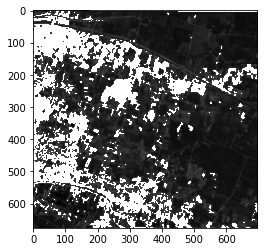

In [ ]:
plt.imshow(Ndbi_2019,interpolation='nearest',cmap=plt.cm.gray)

In [ ]:
Ndbi_2019[Ndbi_2019==1.0] = 1.0
Ndbi_2019[Ndbi_2019!=1.0] = 0.0

# **MULTIPLYING TO CHECK IF BOTH RASTERS HAVE HIGH NDVI AND HIGH NDBI AND WILL BE DENOTED BY WHITE PIXELS.**

In [ ]:
S1=np.multiply(Ndvi_2013,Ndbi_2019)

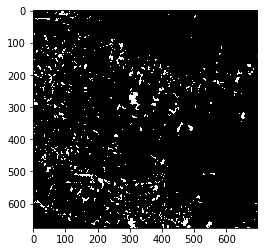

In [ ]:
plt.imshow(S1,interpolation='nearest',cmap=plt.cm.gray)

# **Saving Image as TIFF**

In [ ]:
f_new='/content/builtup_change_NDBI_binary.tiff'
create_raster_from_array(f_new,gdal.Open(path_NDVI_2019),S1)